This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(

    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [5]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.6141 - accuracy: 0.8118 - val_loss: 0.3203 - val_accuracy: 0.8996
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2593 - accuracy: 0.9202 - val_loss: 0.2107 - val_accuracy: 0.9371
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1675 - accuracy: 0.9478 - val_loss: 0.1625 - val_accuracy: 0.9503
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1210 - accuracy: 0.9617 - val_loss: 0.1614 - val_accuracy: 0.9509
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0871 - accuracy: 0.9734 - val_loss: 0.1228 - val_accuracy: 0.9639
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0660 - accuracy: 0.9788 - val_loss: 0.1280 - val_accuracy: 0.9644
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0495 - accuracy: 0.9839 - val_loss: 0.1214 - val_accuracy: 0.9660
Epoch 

**Plotting a validation accuracy comparison**

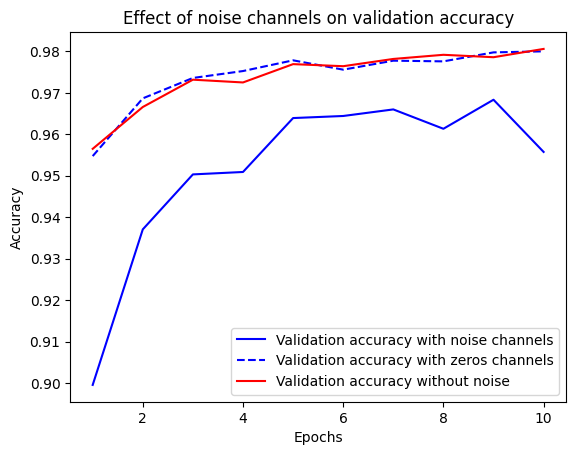

In [14]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc, "r-",
         label="Validation accuracy without noise")

plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

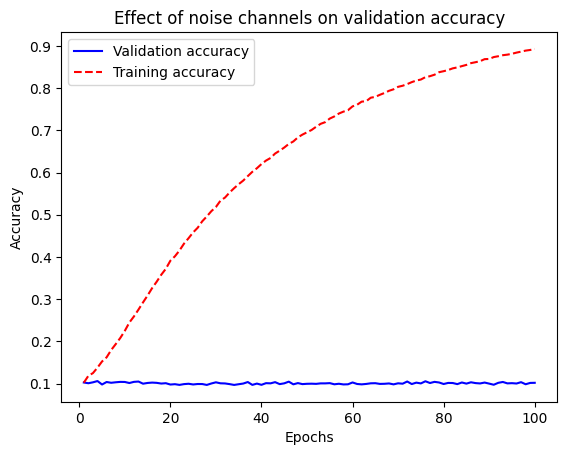

In [22]:
#Need to run the model with random shuffles below first

val_acc_rnd = history_rnd.history["val_accuracy"]
train_acc = history_rnd.history["accuracy"]

epochs = range(1, 101)
plt.plot(epochs, val_acc_rnd, "b-",
         label="Validation accuracy")
plt.plot(epochs, train_acc, "r--",
         label="Training accuracy")


plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [16]:
history_rnd.history

{'loss': [2.3165392875671387,
  2.2991394996643066,
  2.291249990463257,
  2.2800137996673584,
  2.2652201652526855,
  2.2469189167022705,
  2.224756956100464,
  2.1985678672790527,
  2.16977858543396,
  2.138228416442871],
 'accuracy': [0.10333333164453506,
  0.1145416647195816,
  0.12585416436195374,
  0.13589583337306976,
  0.14883333444595337,
  0.16175000369548798,
  0.17643749713897705,
  0.19175000488758087,
  0.20777083933353424,
  0.22612500190734863],
 'val_loss': [2.3054041862487793,
  2.3074731826782227,
  2.319241523742676,
  2.3241829872131348,
  2.3279008865356445,
  2.355755090713501,
  2.3560168743133545,
  2.369847536087036,
  2.391173839569092,
  2.419846773147583],
 'val_accuracy': [0.10324999690055847,
  0.1042499989271164,
  0.10474999994039536,
  0.09791667014360428,
  0.1040833368897438,
  0.10641666501760483,
  0.10141666978597641,
  0.10275000333786011,
  0.10208333283662796,
  0.10591666400432587]}

In [19]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_rnd = model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3168 - accuracy: 0.1022 - val_loss: 2.3077 - val_accuracy: 0.1026
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2991 - accuracy: 0.1185 - val_loss: 2.3132 - val_accuracy: 0.1008
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2917 - accuracy: 0.1248 - val_loss: 2.3147 - val_accuracy: 0.1030
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2807 - accuracy: 0.1378 - val_loss: 2.3282 - val_accuracy: 0.1060
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2654 - accuracy: 0.1524 - val_loss: 2.3349 - val_accuracy: 0.0978
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2474 - accuracy: 0.1622 - val_loss: 2.3492 - val_accuracy: 0.1037
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2233 - accuracy: 0.1794 - val_loss: 2.3589 - val_accuracy: 0.1019

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

**The same model with a more appropriate learning rate**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [20]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 2.3306 - accuracy: 0.0981 - val_loss: 2.3220 - val_accuracy: 0.0999
Epoch 2/20
375/375 [==============================] - 2s 4ms/step - loss: 2.3136 - accuracy: 0.1066 - val_loss: 2.3256 - val_accuracy: 0.1042
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 2.3074 - accuracy: 0.1142 - val_loss: 2.3153 - val_accuracy: 0.1042
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 2.3029 - accuracy: 0.1175 - val_loss: 2.3181 - val_accuracy: 0.1058
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 2.3001 - accuracy: 0.1200 - val_loss: 2.3180 - val_accuracy: 0.1043
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 2.2971 - accuracy: 0.1211 - val_loss: 2.3227 - val_accuracy: 0.1045
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 2.2958 - accuracy: 0.1233 - val_loss: 2.3203 - val_accuracy: 0.1069
Epoch 

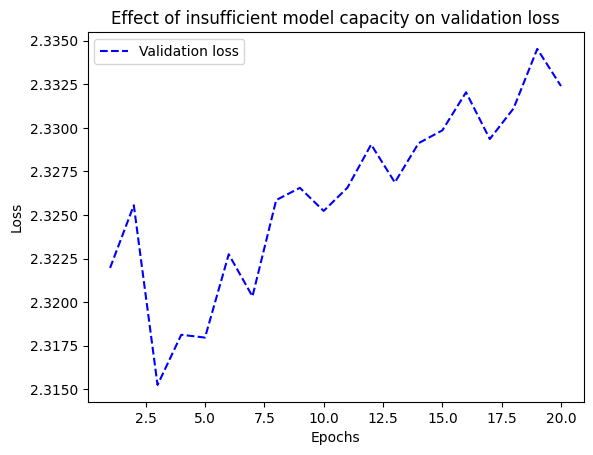

In [23]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [24]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 2.3060 - accuracy: 0.1062 - val_loss: 2.3028 - val_accuracy: 0.1128
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 2.3014 - accuracy: 0.1120 - val_loss: 2.3033 - val_accuracy: 0.1059
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 2.2993 - accuracy: 0.1160 - val_loss: 2.3058 - val_accuracy: 0.1013
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 2.2952 - accuracy: 0.1195 - val_loss: 2.3067 - val_accuracy: 0.1050
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 2.2902 - accuracy: 0.1284 - val_loss: 2.3086 - val_accuracy: 0.1048
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 2.2836 - accuracy: 0.1335 - val_loss: 2.3194 - val_accuracy: 0.1009
Epoch 7/20
375/375 [==============================] - 1s 4ms/step - loss: 2.2750 - accuracy: 0.1407 - val_loss: 2.3208 - val_accuracy: 0.1046
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [25]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 2s 0us/step
Epoch 1/20
30/30 [==============================] - 4s 91ms/step - loss: 0.5444 - accuracy: 0.7768 - val_loss: 0.4217 - val_accuracy: 0.8657
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3494 - accuracy: 0.8895 - val_loss: 0.3404 - val_accuracy: 0.8702
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2643 - accuracy: 0.9121 - val_loss: 0.2909 - val_accuracy: 0.8893
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2159 - accuracy: 0.9291 - val_loss: 0.2873 - val_accuracy: 0.8844
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1815 - accuracy: 0.9407 - val_loss: 0.2840 - val_accuracy: 0.8852
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1569 - accuracy: 0.9485 - val_loss: 0.2777 - val_accuracy: 0.8909
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1366 - accurac

**Version of the model with lower capacity**

In [26]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.6339 - accuracy: 0.6299 - val_loss: 0.5870 - val_accuracy: 0.6729
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5552 - accuracy: 0.7589 - val_loss: 0.5405 - val_accuracy: 0.7706
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5093 - accuracy: 0.8235 - val_loss: 0.5103 - val_accuracy: 0.8039
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4742 - accuracy: 0.8609 - val_loss: 0.4915 - val_accuracy: 0.8128
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4465 - accuracy: 0.8881 - val_loss: 0.4720 - val_accuracy: 0.8441
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.4232 - accuracy: 0.9061 - val_loss: 0.4565 - val_accuracy: 0.8705
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.4033 - accuracy: 0.9216 - val_loss: 0.4501 - val_accuracy: 0.8634
Epoch 8/20
30

**Version of the model with higher capacity**

In [27]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 72ms/step - loss: 0.5558 - accuracy: 0.7173 - val_loss: 0.5868 - val_accuracy: 0.7214
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3308 - accuracy: 0.8625 - val_loss: 0.2953 - val_accuracy: 0.8794
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2408 - accuracy: 0.8998 - val_loss: 0.2993 - val_accuracy: 0.8780
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1816 - accuracy: 0.9291 - val_loss: 0.3679 - val_accuracy: 0.8595
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1391 - accuracy: 0.9515 - val_loss: 0.2994 - val_accuracy: 0.8854
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1125 - accuracy: 0.9599 - val_loss: 0.3573 - val_accuracy: 0.8522
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0817 - accuracy: 0.9731 - val_loss: 0.3053 - val_accuracy: 0.8882
Epoch 8/20
30

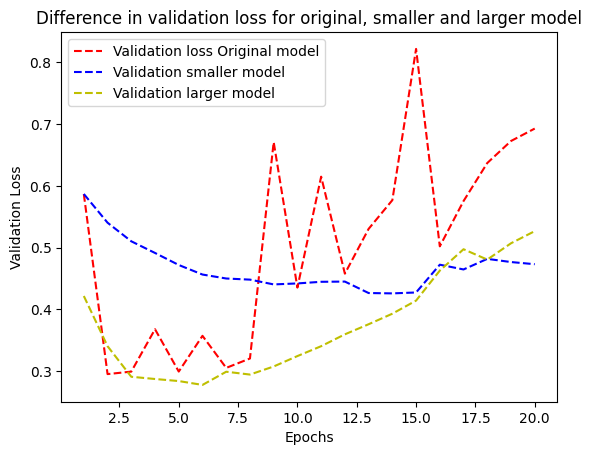

In [37]:
#Visualizing the three models above:

import matplotlib.pyplot as plt
val_loss_original = history_larger_model.history["val_loss"]
val_loss_low = history_smaller_model.history["val_loss"]
val_loss_high = history_original.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "r--",
         label="Validation loss Original model")
plt.plot(epochs, val_loss_low, "b--",
         label="Validation smaller model")
plt.plot(epochs, val_loss_high, "y--",
         label="Validation larger model")
plt.title("Difference in validation loss for original, smaller and larger model")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [28]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 70ms/step - loss: 0.6233 - accuracy: 0.7613 - val_loss: 0.4847 - val_accuracy: 0.8603
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4154 - accuracy: 0.8855 - val_loss: 0.4266 - val_accuracy: 0.8583
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3337 - accuracy: 0.9137 - val_loss: 0.3624 - val_accuracy: 0.8867
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2945 - accuracy: 0.9251 - val_loss: 0.3510 - val_accuracy: 0.8897
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2681 - accuracy: 0.9327 - val_loss: 0.3859 - val_accuracy: 0.8721
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2556 - accuracy: 0.9383 - val_loss: 0.3676 - val_accuracy: 0.8783
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2393 - accuracy: 0.9474 - val_loss: 0.3702 - val_accuracy: 0.8793
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [29]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [30]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 66ms/step - loss: 0.6250 - accuracy: 0.6511 - val_loss: 0.5071 - val_accuracy: 0.8281
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4979 - accuracy: 0.7757 - val_loss: 0.3865 - val_accuracy: 0.8746
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4145 - accuracy: 0.8309 - val_loss: 0.3253 - val_accuracy: 0.8813
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3473 - accuracy: 0.8683 - val_loss: 0.3013 - val_accuracy: 0.8850
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2994 - accuracy: 0.8953 - val_loss: 0.2784 - val_accuracy: 0.8908
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2615 - accuracy: 0.9121 - val_loss: 0.2782 - val_accuracy: 0.8889
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2330 - accuracy: 0.9225 - val_loss: 0.2811 - val_accuracy: 0.8908
Epoch 8/20
30

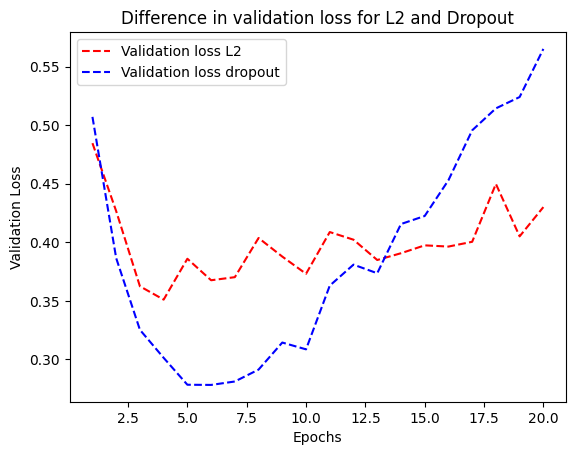

In [34]:
#Difference in validation loss for L2 and Dropout:


import matplotlib.pyplot as plt
val_loss_l2 = history_l2_reg.history["val_loss"]
val_loss_dropout = history_dropout.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss_l2, "r--",
         label="Validation loss L2")
plt.plot(epochs, val_loss_dropout, "b--",
         label="Validation loss dropout")
plt.title("Difference in validation loss for L2 and Dropout")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()

Dropout technique has less validation loss before overfitting than L2

## Summary